In [1]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

df = pd.read_csv('matrix_player_6.csv')
df = df.fillna(0)

In [2]:
temp = df
for index in range(5000) :
    if df.loc[index, [' frameRotationalSpeedZ ']].values > 5 or df.loc[index, [' frameRotationalSpeedZ ']].values < -5 :
        temp = temp.drop(index, axis=0)

In [3]:
avg_height = temp[temp['wheelRotationalSpeedX '] >= 0].loc[:len(temp), 'wheelRotationalSpeedX '].mean()
y, _ = find_peaks(temp.loc[:len(temp), 'wheelRotationalSpeedX '], distance=1000)


print(df['wheelRotationalSpeedX '][4170])#this value gives problems 

print('a')
temp2=[0]*len(y)
count=0
for i in y:
    print(i)
    temp2[count]=(df['wheelRotationalSpeedX '][i])
    print(temp2[count])
    count += 1
    
X = temp[['wheelRotationalSpeedX ', ' frameRotationalSpeedZ ']]

3.71
a
556
1.12
1777
0.96
3075
17.141
4145
8.33
5154
-8.7325
6475
2.275
7830
0.42
8849
2.2225
9938
4.27
11094
-5.68
12494
11.144
13974
-0.462
15475
-19.258
16737
60.767
17886
-10.22
18957
-3.9433
20183
1.6878
21520
0.67
22782
323.65
23806
-0.82
24836
-8.12
26007
186.84
27012
175.0
28012
-3.13
29015
29.698
30208
-1.7267
31392
0.09
32412
0.7
33610
0.81667
34801
0.8
36185
0.94889
37777
-0.55222
38818
0.91
40011
0.98778
41046
0.7
42546
1.5901
44298
0.742
45933
0.10111
47796
46.083
49756
-0.42
51750
0.917
52752
-54.292
54712
0.56
56121
-6.279
57237
65.324
58253
187.22
59832
39.2
60922
157.7
62450
-191.59
63476
183.39
64896
22.991
66303
224.51
67314
169.94
69171
106.17
70344
496.92
71366
221.13
72866
442.19
74073
360.65
75083
365.08
76281
512.81
77964
342.89
79350
480.68
80555
208.13
81998
-6.55
83559
250.6
84572
208.74
85622
135.97
87550
306.03
88594
104.98
90128
312.3
91147
65.905
92277
463.62
93319
369.38
95130
350.42
96471
325.84
97482
321.02
98836
279.56
100400
-5.8644
101585
19.616
102

TypeError: only integer scalar arrays can be converted to a scalar index

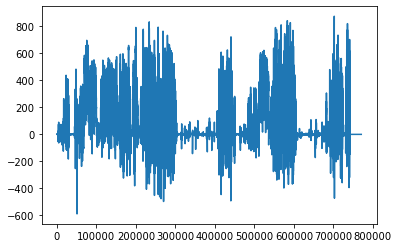

In [4]:
timeline = temp['timeLine']
plt.plot(temp.loc[:len(temp), 'wheelRotationalSpeedX '])
plt.plot(y, temp['wheelRotationalSpeedX '][y], "x")
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

df = pd.read_csv('matrix_player_6.csv')
df = df.fillna(0)

In [6]:
length = int(len(df['timeLine']) * 0.01)
temp = df.iloc[:length, :]


In [7]:
for index in range(length) :
    if df.loc[index, [' frameRotationalSpeedZ ']].values > 5 or df.loc[index, [' frameRotationalSpeedZ ']].values < -5 :
        temp = temp.drop(index, axis=0)

In [8]:
avg_height = temp[temp['wheelRotationalSpeedX '] >= 0].loc[:len(temp), 'wheelRotationalSpeedX '].mean()
tempy, _ = find_peaks(temp.loc[:len(temp), 'wheelRotationalSpeedX '], distance=1000)
print(len(tempy))
print(tempy)
X = temp[['wheelRotationalSpeedX ']]

6
[ 556 1777 3075 4145 5269 6276]


In [9]:
peaks = [0]*(len(temp[' frameRotationalSpeedZ ']))
for peak in tempy :
    peaks[peak] = 1
print(len(peaks))
print(len(temp))
temp["IsPeak"] = peaks
y = temp["IsPeak"].values

6956
6956


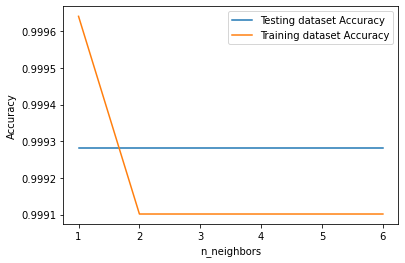

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

neighbors = np.arange(1, 7)#create an array from 1 to 199

train_accuracy = np.empty(len(neighbors))#both are random value arrays
test_accuracy = np.empty(len(neighbors))#with a length of 200
 
    
for i, k in enumerate(neighbors):# is the index and k the value of the array neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #aqui va bien
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
     
    
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

reg = LinearRegression()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
reg.fit(X_train, y_train)

LinearRegression()

In [14]:
reg.score(X_test, y_test)

-0.00447713062926236